# Economics with [Jupyter Notebooks](http://jupyter.org/)

### Introduction
* Jupyter Notebook is "a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more."

* Open-source, browser-based
* Evolved from  [ipython notebook](http://ipython.org/notebook.html) to leverage huge scientific python ecosystem.
* Now a 'language agnostic' platform so that you can use any of 50+ other kernels including MATLAB, Octave, [Stata](https://github.com/cpbl/pystata), Julia, etc.

* **Open-source, fast evolving, large community:** Widely used in academic and scientific computing community.

* **Ties projects together:** Code, data, documentation, output and analysis all in one place.

* **Encourages reproducible science:**  
   - Easy workflow from exploratory analysis to publish. 
   - Works well with github and other open-source sharing tools.

#### Ways to run and view notebooks
##### Jupyter server for interactive computing 
* Run on a local machine or cloud server to modify code and results on the fly. A few options:
     - [Jupyter notebook on your local machine](https://www.continuum.io/downloads).  I recommend the [Anaconda distribution](https://www.continuum.io/downloads) for easy installation of Jupyter and scientific python.
     - [DHBox](http://dhbox.org/): Graduate Center cloud server. You can install new libraries and save work.
     - [Try Jupyter](https://try.jupyter.org/): cloud server, but you can't save work.
   

##### Static rendering for presentations and publishing.

* Simple or beautifully styled HTML or PDF renderings using tools and services such as github, nbconvert, [Sphinx](http://www.sphinx-doc.org/) and [Read the Docs](https://readthedocs.org/).  
* For example **this very notebook** is:
     - hosted on [the Dev-II repository on github](https://github.com/jhconning/Dev-II/blob/master/notebooks/jupyter_notebooks.ipynb) where it is rendered in simple HTML.
     - viewable in HTML or as javascript slideshow [via nbviewer](Code, data, documentation, output and analysis all in one place.) (to see in slideshow mode click on 'present' icon on top right).
     - Tied together with other documents via Sphinx to create a [website on readthedocs](http://dev-ii-seminar.readthedocs.org/en/latest/jupyter_notebooks.html) 
     - Also viewable as a [PDF book on readthedocs](https://media.readthedocs.org/pdf/dev-ii-seminar/latest/dev-ii-seminar.pdf)


## A Simple first example:  

### Are incomes per capita converging or diverging across countries?

#### Neoclassical growth theory predicts incomes per capita should converge

* Solow-growth model with Cobb-Douglas technology $f(k)=k^\alpha$.  
* Technology, saving rate $s$, capital depreciation rate $\delta$, population growth rate $n$ and technological change rate $g$ assumed same across countries.
* Steady-state value of capital per worker will be: $k^{*} = (g/s)^\frac{1}{\alpha-1} $. 
* Transitional dynamics: $\dot{k}(t) = s k(t)^{t} -(n+g+\delta)k(t)$
* Diminishing returns to the accumulated factor $k$ implies: 
   - Lower initial capital stock implies lower initial per-capita GDP.
   - Country that starts with lower capital stock and GDP per capita 'catches up' by growing faster.

### Testing for convergence

**Did countries with low levels of income per capita in 1960 grow faster?**

I found a dataset from World Penn Tables [here](http://www.reed.edu/economics/course_pages/304_f07/asgns/HW7_empirical.pdf).  Now import useful libraries for data handling and plots and load the dataset into a pandas dataframe:

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings

df = pd.read_stata(".\data\country.dta")

D:\Users\jconning\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(in the future we will follow best practice and place library imports at the top of our notebooks).

#### Scatterplot of log GDP per capita and average growth 1960-2000:

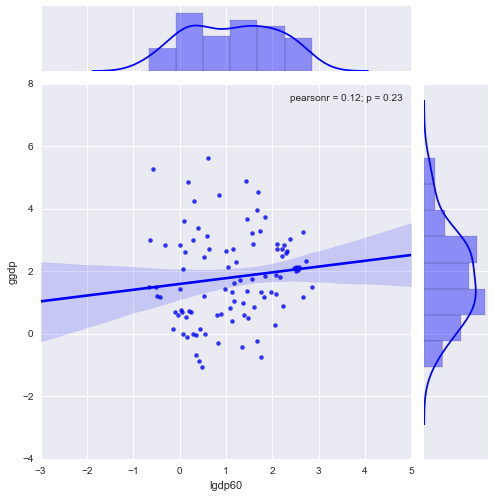

In [2]:
g = sns.jointplot("lgdp60", "ggdp", data=df, kind="reg",
                  color ="b", size=7)

#### Same plot but excluding African countries:

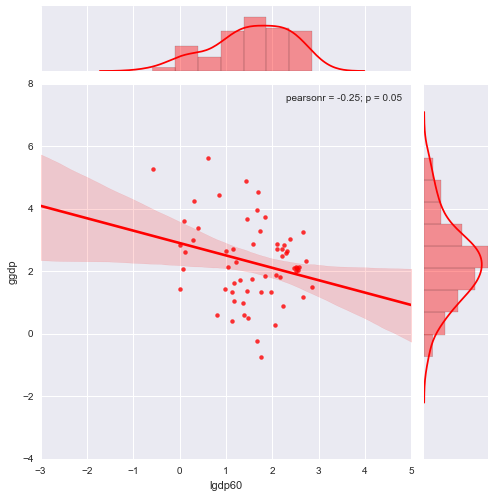

In [3]:
g = sns.jointplot("lgdp60", "ggdp", data=df[df.cont !="Africa"], kind="reg", 
                  color ="r", size=7)

#### When running interactively ... radio buttons to switch region and re-plot:

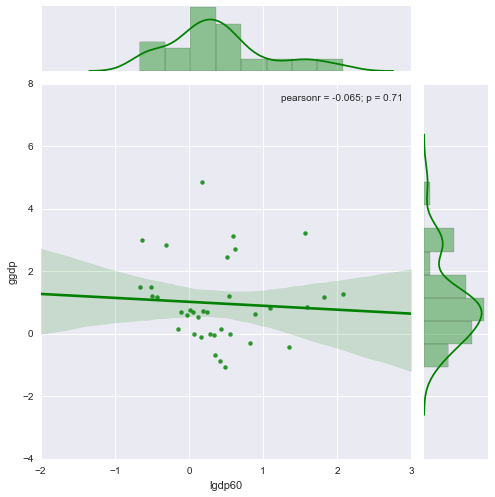

In [4]:
from ipywidgets import interact, FloatSlider, RadioButtons
region_buttons = RadioButtons(options=
        ['Africa', 'Europe & N. America', 'Asia','S. America'])
@interact(region=region_buttons)
def jplot(region):
    sns.jointplot("lgdp60", "ggdp", data=df[df.cont == region], 
                  kind="reg", color ="g", size=7)

## Where to learn more about jupyter notebooks and scientific python

* The best short primer for learning about Jupyter notebooks and scientific python that I know about has been written by John Stachurski is available at this link: [http://quant-econ.net/py/learning_python.html](http://quant-econ.net/py/learning_python.html)
